In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
import io
import utils as ut
import importlib

In [2]:
# Read data
data_path = '../data/diabetes_prediction_dataset.csv'
data = pd.read_csv(data_path, sep=',')

In [3]:
# Revisamos los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [5]:
# se eliminan los generos distintos de Female, Male
data = data[(data['gender'].isin(['Female','Male']))].copy()

In [6]:
data.smoking_history.value_counts()

smoking_history
No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: count, dtype: int64

In [7]:
#Lets merge 'former', 'not current' and 'ever' because these may overlap one each other
smoking_map = {
    'No Info':'unknown',
    'never':'never',
    'former':'former',
    'current':'current',
    'not current':'former',
    'ever':'former'
}

data['smoking_history'] = data.smoking_history.map(smoking_map)


In [8]:
# Revisamos las estadisticas de las columnas con variables numericas
data.select_dtypes(include='number').describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Se sospecha que 'hypertension','heart_disease','diabetes' son categoricas

In [9]:
for col in ['hypertension','heart_disease','diabetes']:
    print(data['heart_disease'].value_counts(dropna=False))



heart_disease
0    96040
1     3942
Name: count, dtype: int64
heart_disease
0    96040
1     3942
Name: count, dtype: int64
heart_disease
0    96040
1     3942
Name: count, dtype: int64


Efectivamente son variable categoricas, se transforman a boolean

In [10]:
# Se transforman a booleano
data['heart_disease'] = data['heart_disease'].astype(bool)
data['hypertension'] = data['hypertension'].astype(bool)
data['diabetes'] = data['diabetes'].astype(bool)

Revisamos nuevamente las variables numericas

In [11]:
data.select_dtypes(include='number')

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  bool   
 3   heart_disease        99982 non-null  bool   
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  bool   
dtypes: bool(3), float64(3), int64(1), object(2)
memory usage: 5.6+ MB


In [13]:
# Con las correciones realizadas segmentamos las variables en continuas y discretas
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
discrete_columns = [col for col in data.columns if not col in continuous_columns]

### Exploración Grafica, Histogramas de la población completa

Graficamos las variables continuas

c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x0000016299A39210>
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x000001629C93F100>
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.v

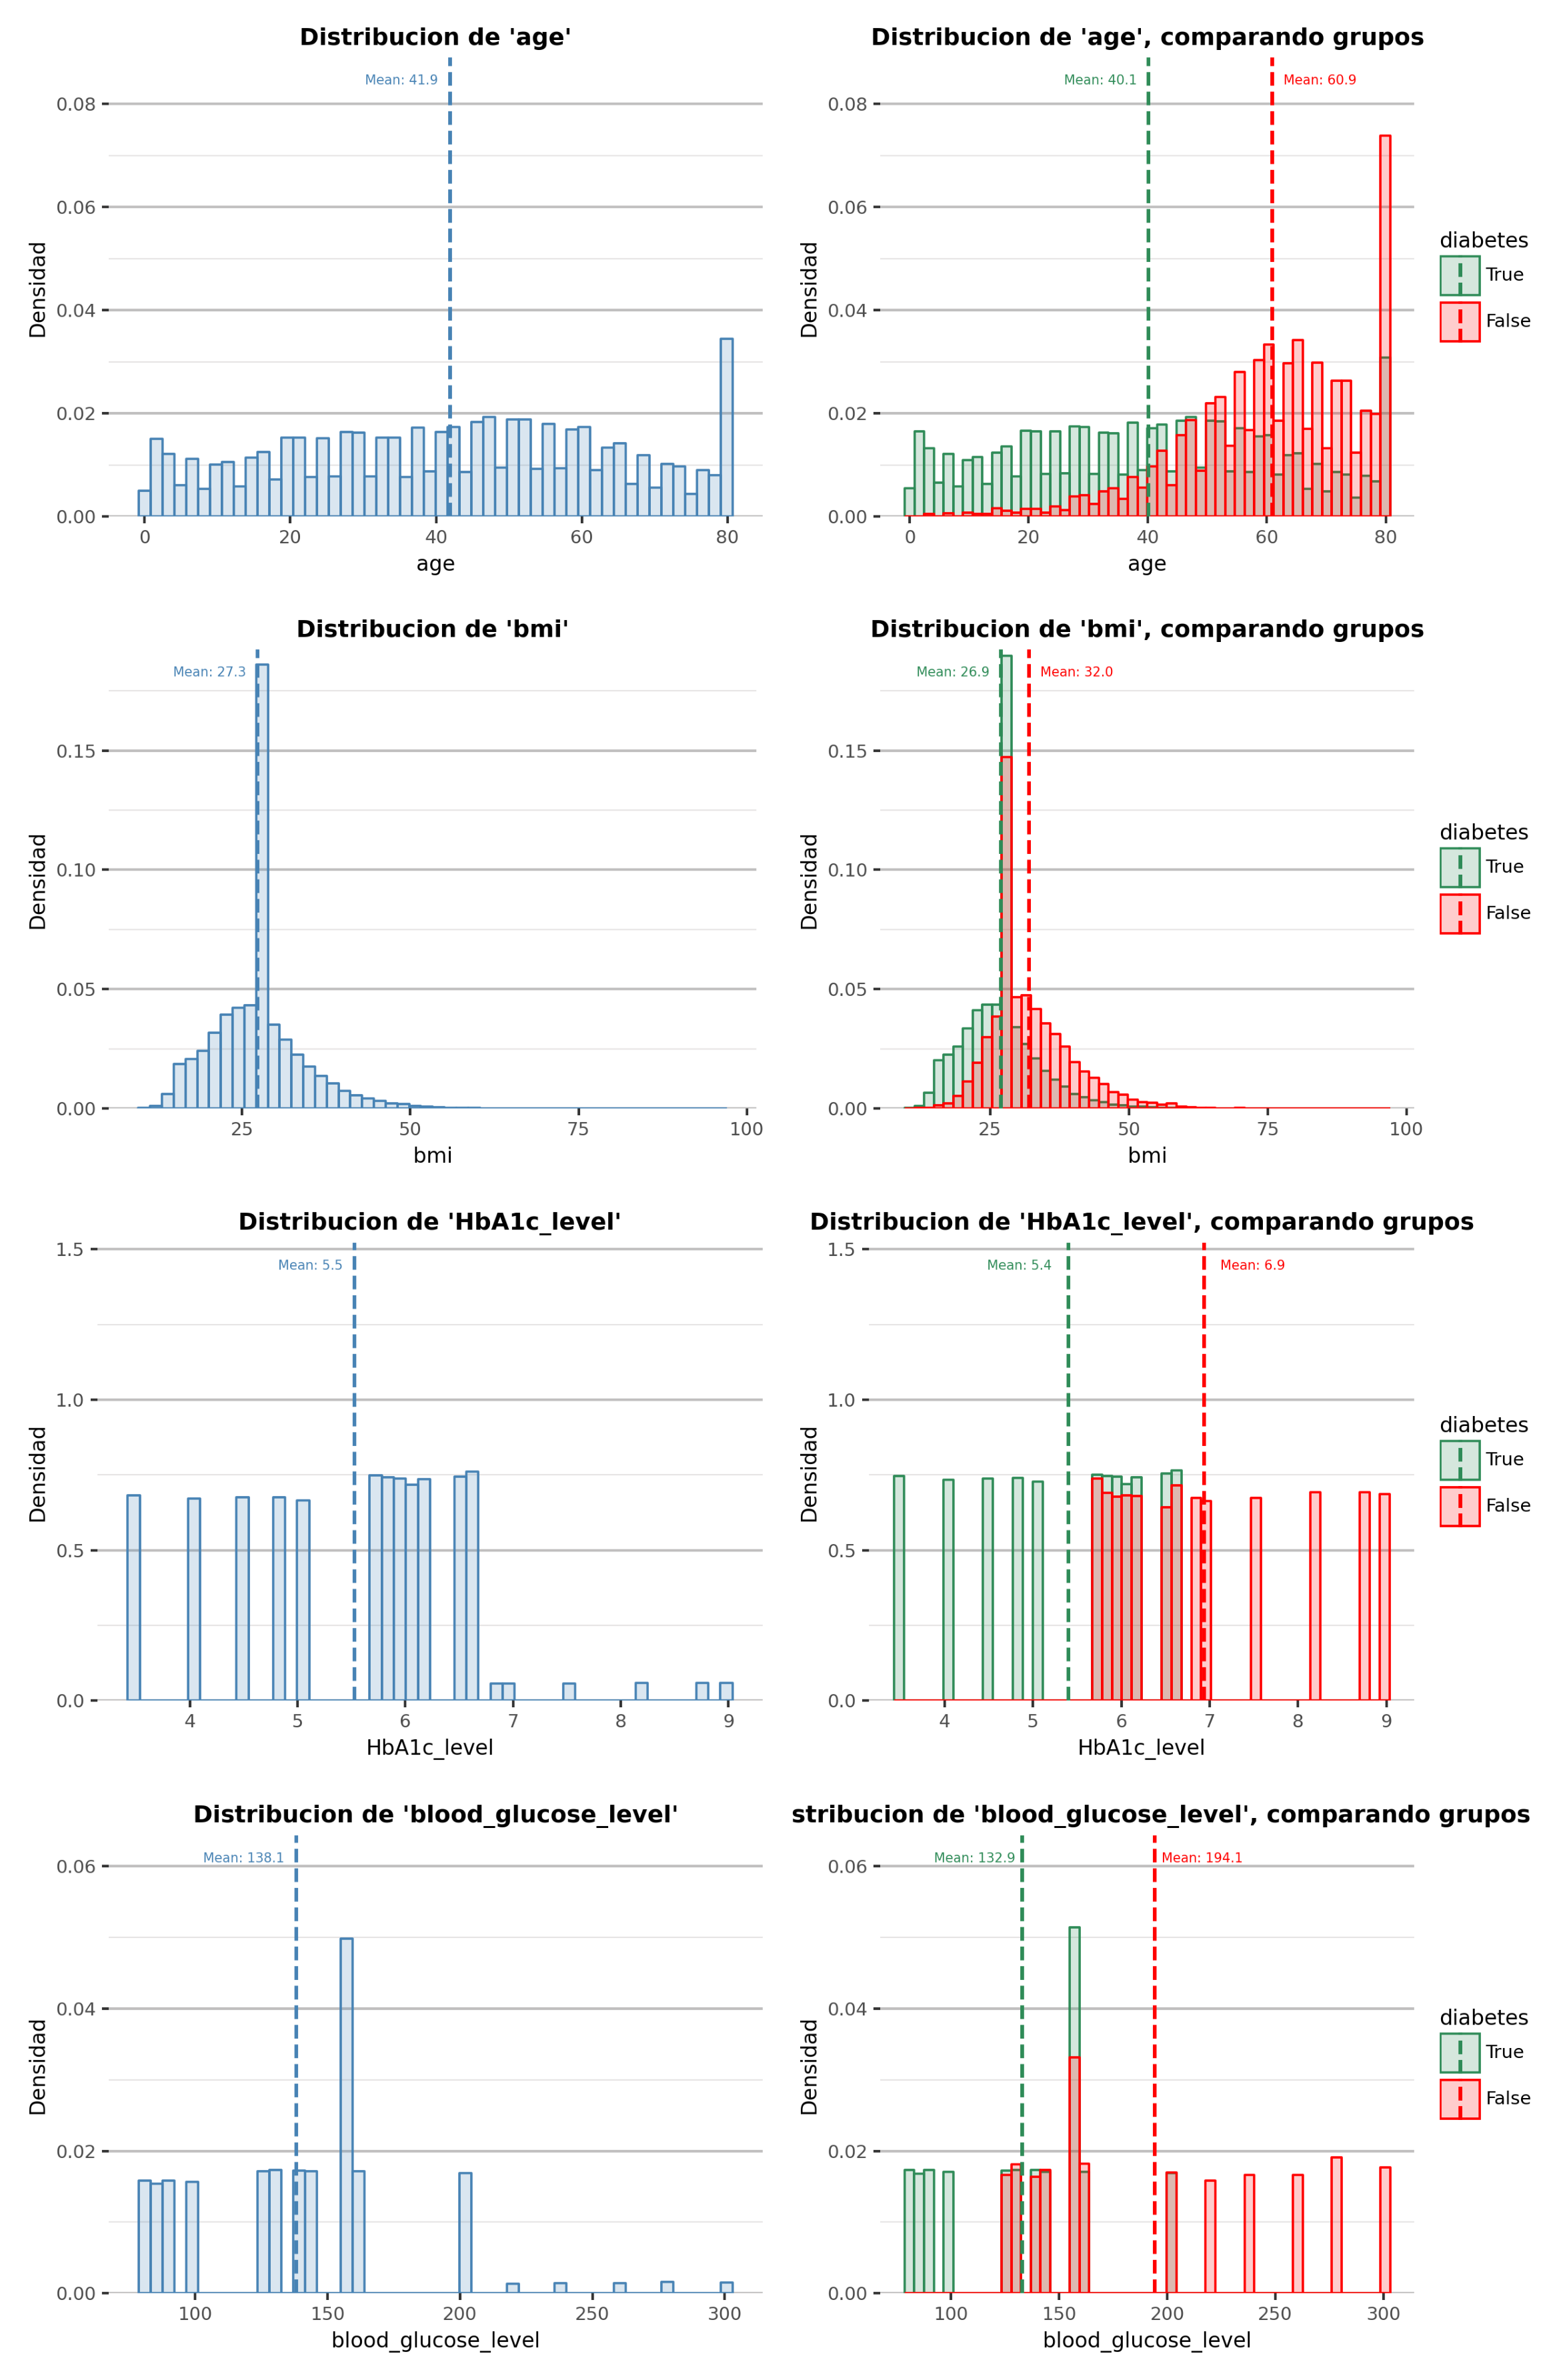

In [14]:
importlib.reload(ut)
# Plot histograms separated by diabetes diagnostic
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
colors_per_group = {True:'red', False:'seagreen'}
color_general = 'steelblue'
target_col = 'diabetes'
all_plots=[]
# Subplot size
subplot_size = (4,3)
rows_grid =4
columns_grid = 2
# grid size
grid_size = ut.get_grid_size(subplot_size,rows_grid,columns_grid)

for col in continuous_columns:
    y_max_plot = ut.get_y_max_plot(data,col,target_col)
    # Plot histograms by all rows
    plot_all = ut.plot_all_data(data,col,color_general,subplot_size,y_max_plot)
    all_plots.append(plot_all)
    # Plot histograms separated by diabetes diagnostic
    plot_grouped = ut.plot_per_group_data(data,col,target_col,colors_per_group,subplot_size,y_max_plot)
    all_plots.append(plot_grouped)

# Create a figure for 4x2 grid
fig, axes = plt.subplots(rows_grid, columns_grid, figsize=grid_size,dpi=300)

for ax, p in zip(axes.flatten(),all_plots):
    buf = io.BytesIO()
    p.save(buf, format='png',dpi=300)      # Save plot to in-memory buffer
    buf.seek(0)
    img = plt.imread(buf)
    ax.imshow(img)
    ax.axis('off')  # hide axes

plt.tight_layout()
plt.show()    

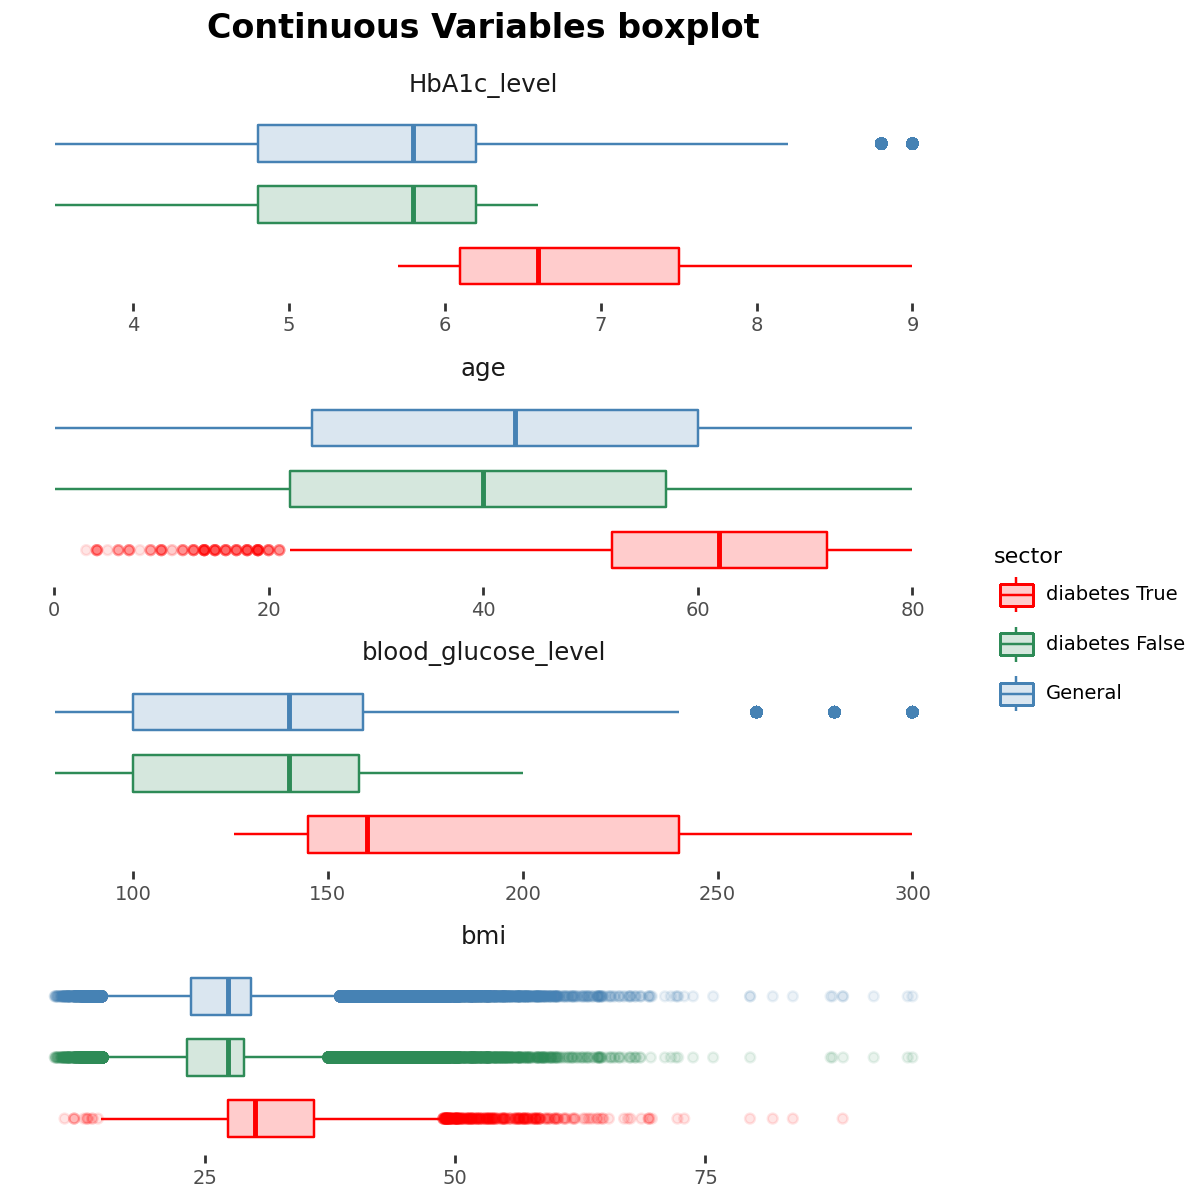

In [ ]:
# Dibujamos los boxplot por cada variable continua
importlib.reload(ut)
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target_var = 'diabetes'
colors = {'General':'steelblue', 'diabetes False':'seagreen', 'diabetes True':'red'}
fig_size = (6,6)

ut.box_plot_continuous(data,continuous_columns,target_var,fig_size,colors).show()

In [93]:
discrete_cols = ['diabetes','gender', 'hypertension', 'heart_disease', 'smoking_history']

In [225]:
summary_discretes = pd.DataFrame({'category':pd.Series(dtype='str'),'freq':[],'variable':[]})
for col in discrete_cols:
    summ_col = data[col].value_counts().reset_index(name='freq')
    summ_col['variable'] = col
    summ_col = summ_col.rename(columns={col:'category'})
    summary_discretes = pd.concat([summary_discretes,summ_col], ignore_index=True)

summary_discretes['category'] = summary_discretes['category'].astype(str)
summary_discretes = summary_discretes.sort_values(by=['variable','freq'],ascending=[True,False])  

summary_discretes


,category,freq,variable
0,False,91482.0,diabetes
1,True,8500.0,diabetes
2,Female,58552.0,gender
3,Male,41430.0,gender
6,False,96040.0,heart_disease
7,True,3942.0,heart_disease
4,False,92497.0,hypertension
5,True,7485.0,hypertension
8,unknown,35810.0,smoking_history
9,never,35092.0,smoking_history


In [234]:
summary_discretes.groupby('variable').apply(lambda g: (g['category'].tolist(), g['category'].tolist()))
summary_discretes.category.tolist()
summary_discretes.category.tolist()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12392\1967353380.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


['False',
 'True',
 'Female',
 'Male',
 'False',
 'True',
 'False',
 'True',
 'unknown',
 'never',
 'former',
 'current']

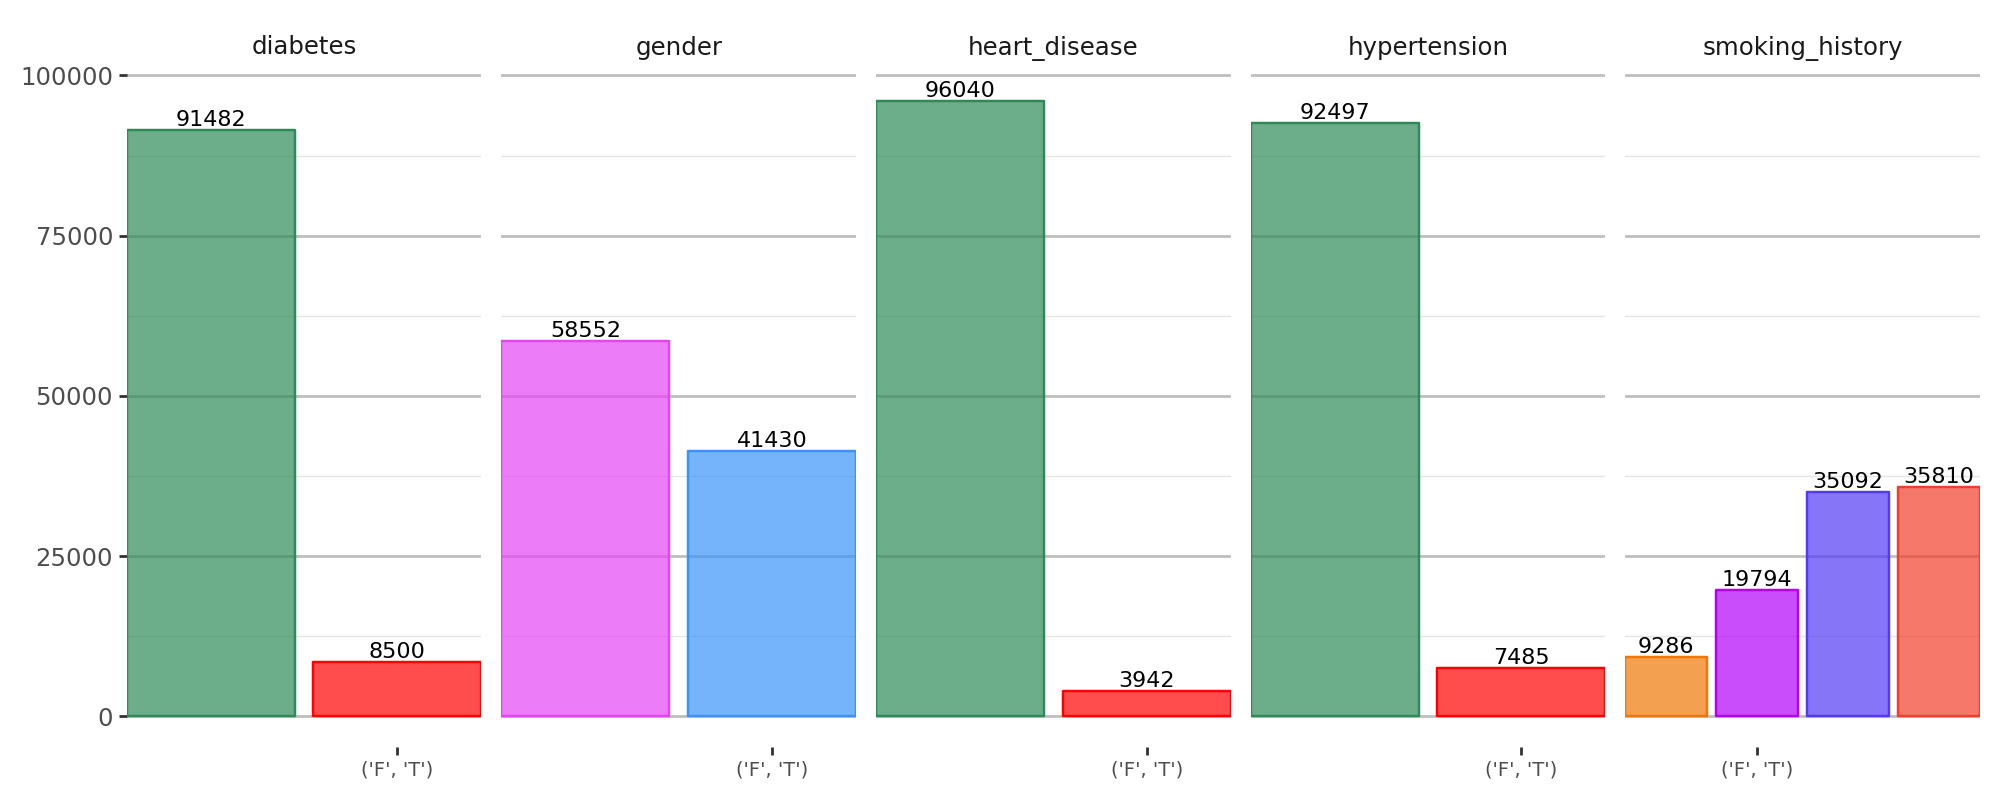

In [ ]:
fig_size = (10,4)
colors = {'Female':'#e643f5',
          'Male':'#3993fa',
          'False':'seagreen',
          'True':'red',
          'current': "#F07706",
          'former':  "#b200f9",
          'never':   "#533af5",
          'unknown': "#f23e2a",         
}


x_ticks_positions = [('False', 'True')]
x_ticks_labels=[('F', 'T')]

(
    p9.ggplot(summary_discretes, p9.aes(x='category', y='freq', fill='category',color='category',label='freq'))
    +p9.geom_col(
        show_legend = False,
        alpha = 0.7
    )
    + p9.geom_text(
        p9.aes(label='freq'),
        va='bottom',
        format_string='{:.0f}',
        nudge_y=0.05,
        show_legend= False,
        size = 8,
        color = 'black'
    )    
    + p9.facet_grid('~variable',scales='free_x')
    + p9.scale_fill_manual(colors)
    + p9.scale_color_manual(colors)
    + p9.scale_y_continuous(expand=(0.05, 0))
    + p9.scale_x_discrete(expand=(0,0), breaks=x_ticks_positions, labels=x_ticks_labels)
    + p9.theme(
        panel_background=p9.element_rect(fill="#ffffff"),
        plot_background=p9.element_rect(fill='#ffffff'),
        strip_background=p9.element_rect(fill='#ffffff'),
        panel_grid_major_y=p9.element_line(color="#c0bfbf"),
        panel_grid_minor_y=p9.element_line(color="#e6e4e4ff"),
        axis_text_x=p9.element_text(size=7),
        axis_title_x=p9.element_blank(),
        axis_title_y=p9.element_blank(),
        plot_title=p9.element_text(size=12, weight="bold"),
        legend_title=p9.element_text(size=8),
        legend_text=p9.element_text(size=7),
        figure_size=fig_size
    )
).show()

In [ ]:
# Realizar graficos de barras por cada variable categorica y mostrar la incidencia del siniestro en cada clase
# Kruska-Wallis, continua vs target
# Chi-cuadrado, categorica vs target